In [1]:
import pandas as pd

df = pd.read_csv('/content/insurance (1).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

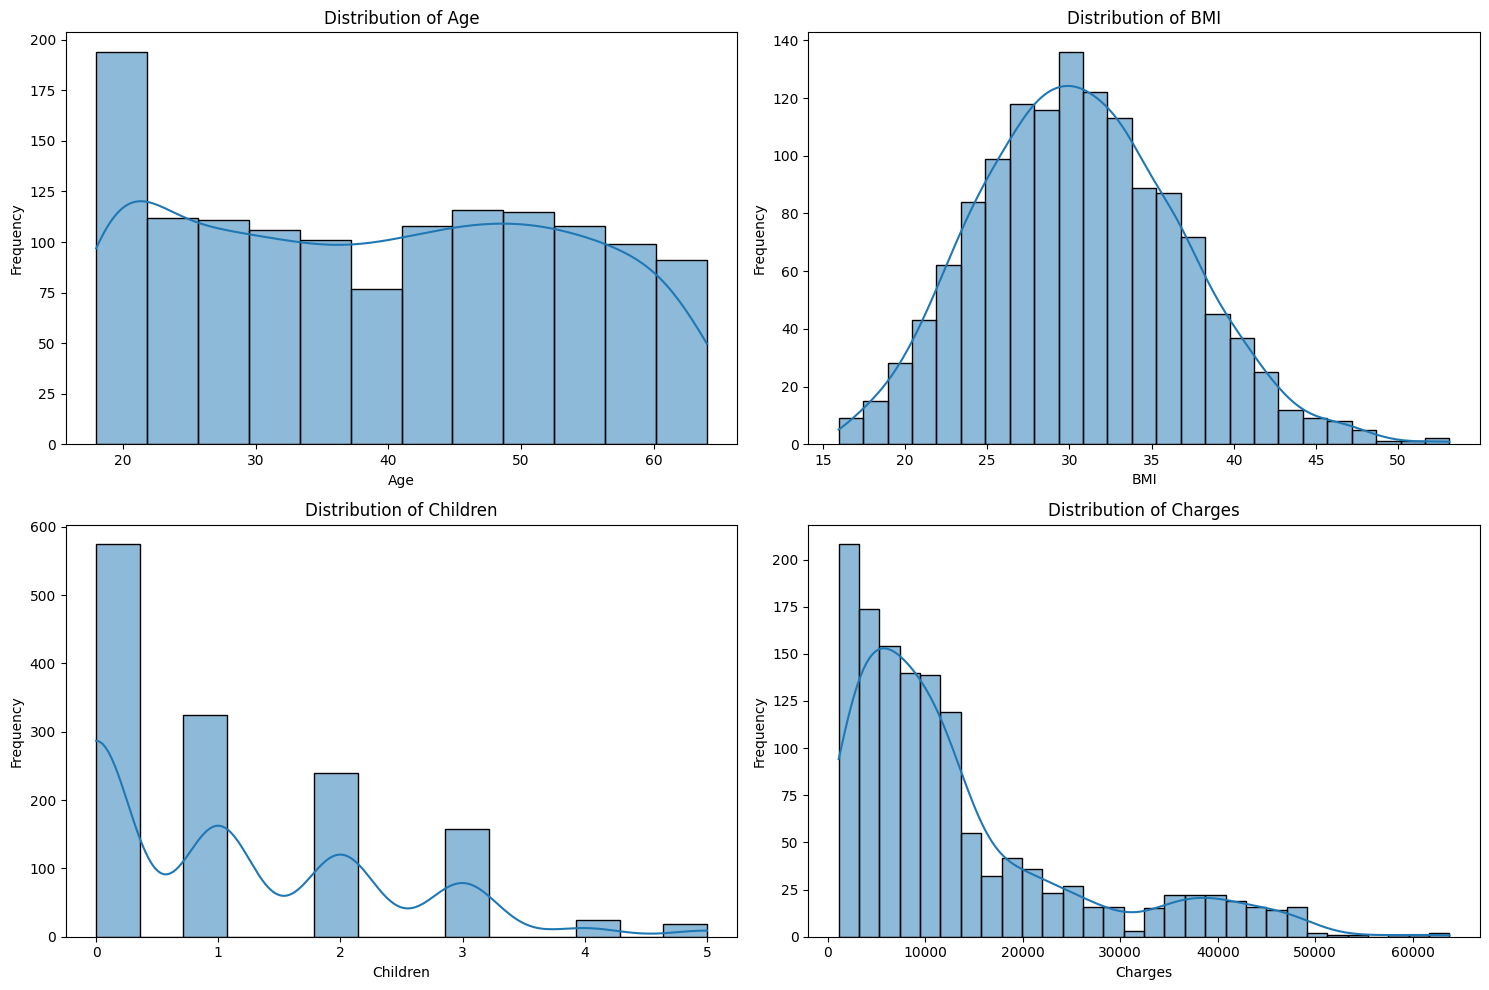

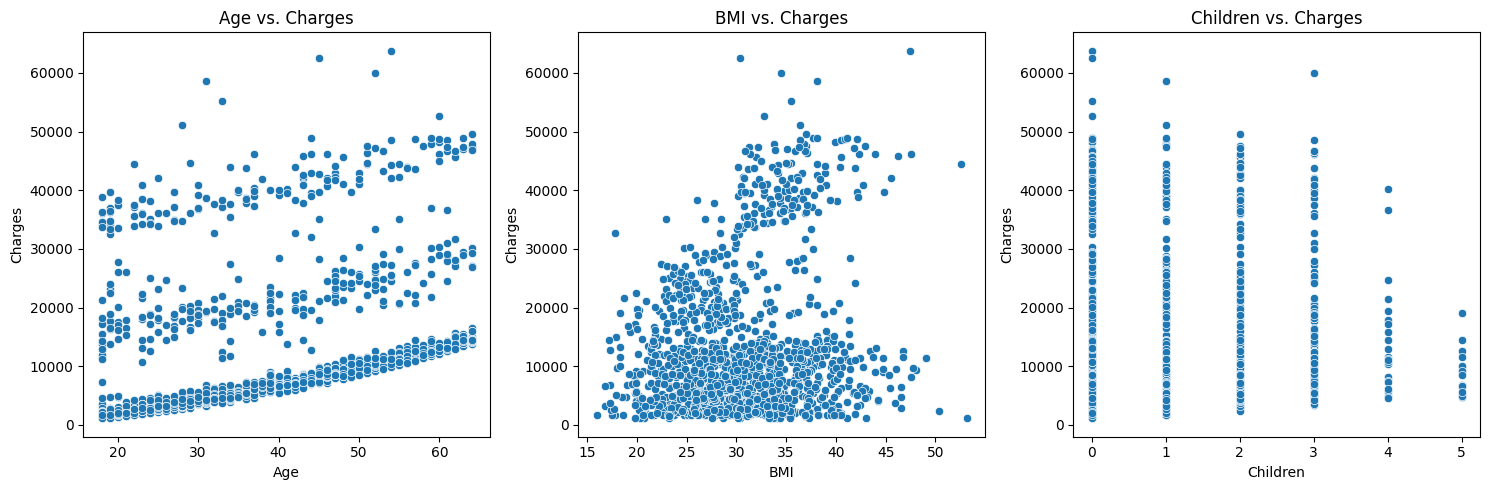

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for better visualization
plt.figure(figsize=(15, 10))

# Distribution plots for numerical features
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['children'], kde=True)
plt.title('Distribution of Children')
plt.xlabel('Children')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plots for numerical features vs. charges
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs. Charges')
plt.xlabel('Children')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

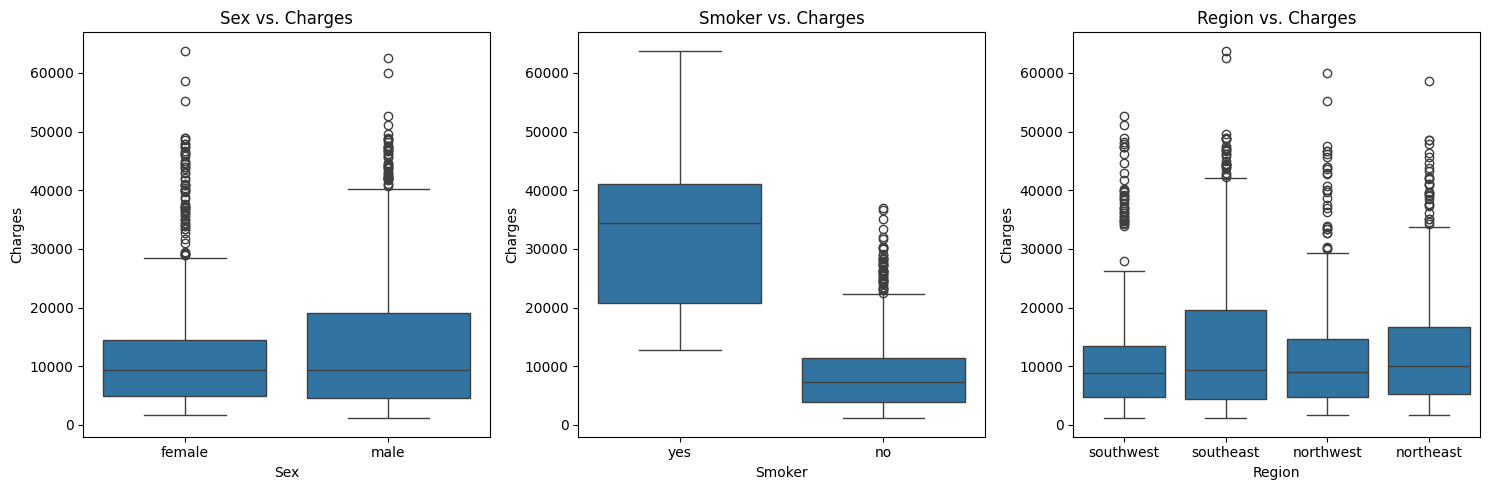

In [4]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs. Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs. Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs. Charges')
plt.xlabel('Region')
plt.ylabel('Charges')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

# Identify categorical and numerical columns
categorical_cols = ['sex', 'smoker', 'region']
numerical_cols = ['age', 'bmi', 'children']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Initialize and fit StandardScaler for numerical features
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("DataFrame after encoding categorical variables and scaling numerical features:")
print(df_encoded.head())

DataFrame after encoding categorical variables and scaling numerical features:
        age       bmi  children      charges  sex_male  smoker_yes  \
0 -1.438764 -0.453320 -0.908614  16884.92400     False        True   
1 -1.509965  0.509621 -0.078767   1725.55230      True       False   
2 -0.797954  0.383307  1.580926   4449.46200      True       False   
3 -0.441948 -1.305531 -0.908614  21984.47061      True       False   
4 -0.513149 -0.292556 -0.908614   3866.85520      True       False   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


Mean Squared Error (MSE): 33596915.85
R-squared (R2) Score: 0.78


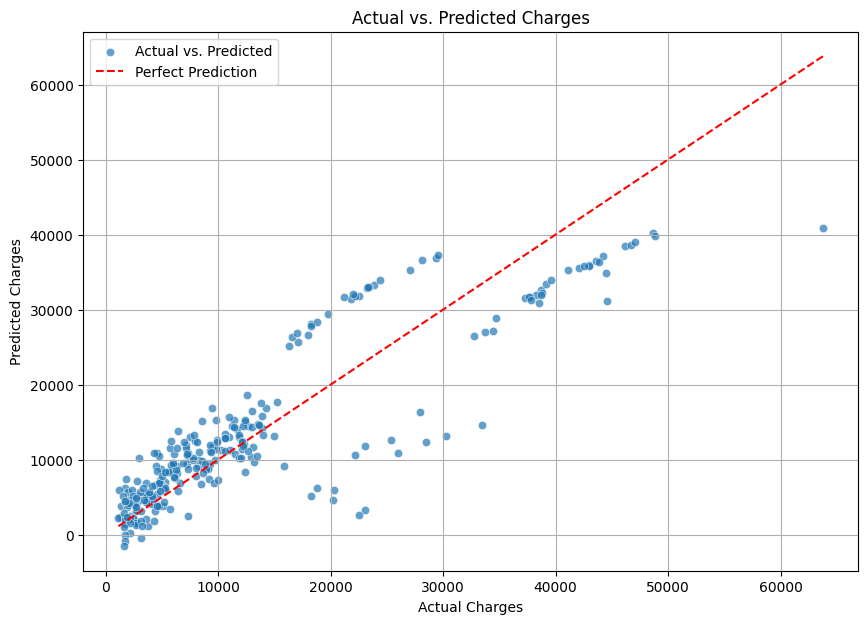

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the X_test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R-squared values
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

# Visualize actual vs. predicted charges
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, label='Actual vs. Predicted')

# Plot a diagonal line (x=y) for perfect prediction
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')

plt.title('Actual vs. Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import pandas as pd

# Get feature names from the training data (X_train)
feature_names = X_train.columns

# Get the coefficients from the trained model
coefficients = model.coef_

# Create a DataFrame to store feature names and their coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of coefficients to identify most influential features
coef_df['Absolute_Coefficient'] = abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

print("Most influential features based on model coefficients:")
print(coef_df_sorted.drop(columns='Absolute_Coefficient'))

Most influential features based on model coefficients:
            Feature   Coefficient
4        smoker_yes  23651.128856
0               age   3609.149018
1               bmi   2054.885063
7  region_southwest   -809.799354
6  region_southeast   -657.864297
2          children    512.478869
5  region_northwest   -370.677326
3          sex_male    -18.591692
